# SNCosmo Spectral Models

Test spectral models used in SNCosmo v1.7. The documentation is provided in

https://sncosmo.readthedocs.io/en/v1.7.x/models.html

and the list of built-in sources is

https://sncosmo.readthedocs.io/en/v1.7.x/source-list.html

In [2]:
import sncosmo
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=12)

In [3]:
def plot_fluxes(model, wl, t0, obs_times, sntype='Ia', scale=1e-17, f0=None):
    """Plot fluxes from a selection of epochs for a particular model.
    
    Parameters
    ----------
    model: sncosmo.Model
        A TimeSeries containing spectra vs. epoch data.
    wl: ndarray
        Array of wavelengths, in units of angstroms.
    t0: float
        Reference observation time, in days.
    obs_times: ndarray
        Array of observation times, in days.
    sntype: str
        SN spectral type (Ia, IIP, ...).
    scale: float
        Flux scale, in units of ergs/cm2/s/Angstrom.
    f0: ndarray
        Flux at peak luminosity of the explosion.
    """
    # Create a 4x4 axis grid.
    fig, axes = plt.subplots(4,4, figsize=(8,7), sharey=True)
    fig.subplots_adjust(wspace=0., hspace=0.,
                        left=0.1, right=0.95, bottom=0.075, top=0.925)
    axes = axes.flatten()

    # Plot fluxes for 16 epochs.
    for i, (ax, t) in enumerate(zip(axes, obs_times)):
        # Plot the flux at peak luminosity.
        if f0 is not None:
            ax.plot(wl, f0 / scale, 'k:', alpha=0.5)

        # Plot the flux at the current epoch.
        flux = model.flux(t, wl) / scale
        ax.plot(wl, flux, label='{:g} d'.format(t-t0))

        row, col = i // 4, i % 4

        if row==1 and col==0:
            exponent = np.log10(scale)
            ax.set(ylabel=r'flux [$10^{{{:g}}}$ erg cm$^{{-2}}$ s$^{{-1}}$ $\AA^{{-1}}$]'.format(exponent),
                   yticks=(0., 0.5, 1))

        if row==3 and col==1:
            ax.set(xlabel=r'wavelength $\AA$')
        else:
            ax.set(xticklabels=[])

        ax.set(xlim=(wl[0], wl[-1]),
               ylim=(-0.1,1.1))

        ax.legend(loc='best', fontsize=8)

    fig.suptitle('SN {} Model ({} v{})'.format(sntype, model.source.name, model.source.version));
    return fig

## SN Ia Models

### hsiao Model

This is the default model used in the SNCosmo documentation, and comes from E.Y. Hsiao et al., *K-Corrections and Spectral Templates of Type Ia Supernovae*, ApJ **663**:1187, 2007, [astro-ph/0703529](https://arxiv.org/abs/astro-ph/0703529).

In [4]:
t0 = 55000.
sn_ia = sncosmo.Model(source='hsiao')
sn_ia.set(z=0., t0=t0, amplitude=1e-9)

print(sn_ia.source)

class      : TimeSeriesSource
name       : 'hsiao'
version    : 3.0
phases     : [-20, .., 85] days
wavelengths: [1000, .., 25000] Angstroms
parameters:
  amplitude = 1e-09


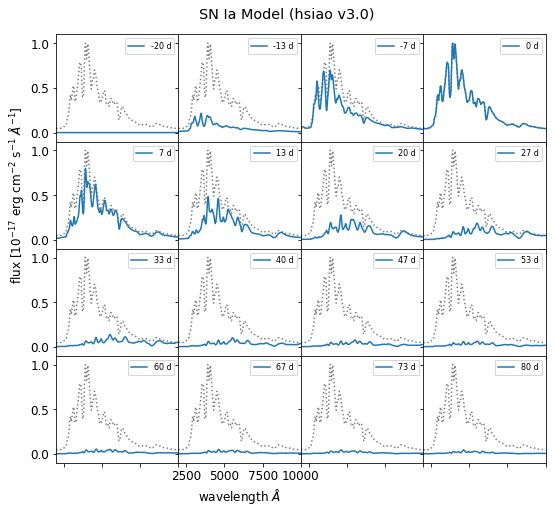

In [5]:
wl = np.arange(2000, 10000, 1)
dt = np.round(np.linspace(-20, 80, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(t0, wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, sntype='Ia', scale=1e-17, f0=f0)

### nugent-sn1a Model

Reference: P. Nugent, A. Kim, S. Perlmutter, *K-Corrections and Extinction Corrections for Type Ia Supernovae*, PASP **114**:803, 2002, [astro-ph/0205351](https://arxiv.org/abs/astro-ph/0205351).

In [6]:
t0 = 55000.
sn_ia = sncosmo.Model(source='nugent-sn1a')
sn_ia.set(z=0., t0=t0, amplitude=1e-9)

print(sn_ia.source)

class      : TimeSeriesSource
name       : 'nugent-sn1a'
version    : 1.2
phases     : [0, .., 90] days
wavelengths: [1000, .., 25000] Angstroms
parameters:
  amplitude = 1e-09


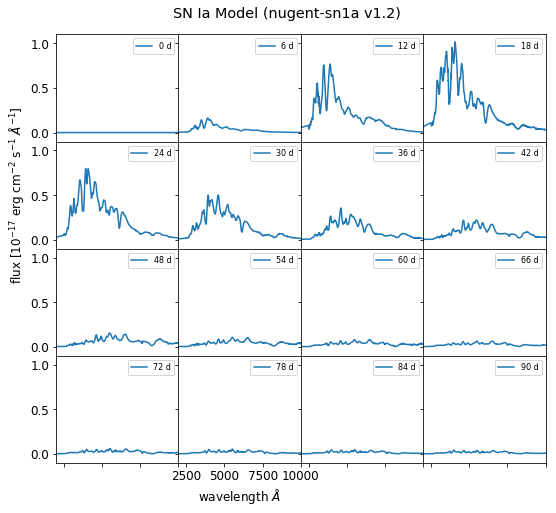

In [7]:
wl = np.arange(2000, 10000, 1)
dt = np.linspace(0, 90, 16)
obs_times = t0 + dt

fig = plot_fluxes(sn_ia, wl, t0, obs_times, sntype='Ia', scale=1e-17)

### nugent-sn91t

Reference: D. Stern et al., *Discovery of a Transient U-Band Dropout in a Lyman Break Survey: A Tidally Disrupted Star at z=3.3?*, ApJ **612**:690, 2004, [astro-ph/0405482](https://arxiv.org/abs/astro-ph/0405482).

In [8]:
t0 = 55000.
sn_ia = sncosmo.Model(source='nugent-sn91t')
sn_ia.set(z=0., t0=t0, amplitude=1e-9)

print(sn_ia.source)

class      : TimeSeriesSource
name       : 'nugent-sn91t'
version    : 1.1
phases     : [0, .., 93] days
wavelengths: [1000, .., 25000] Angstroms
parameters:
  amplitude = 1e-09


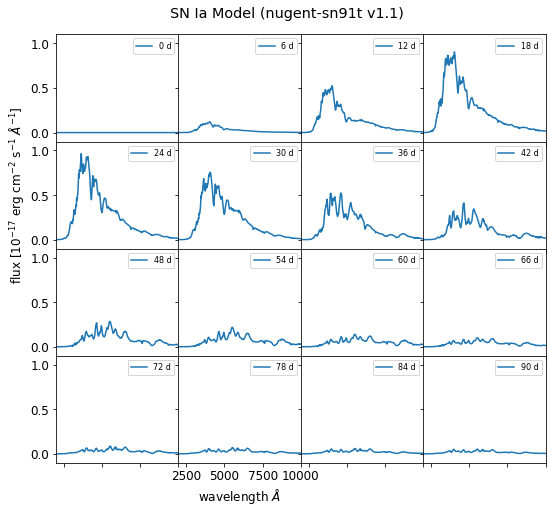

In [9]:
wl = np.arange(2000, 10000, 1)
dt = np.linspace(0, 90, 16)
obs_times = t0 + dt

fig = plot_fluxes(sn_ia, wl, t0, obs_times, sntype='Ia', scale=1e-17)

### nugent-sn91bg

Reference: P. Nugent, A. Kim, S. Perlmutter, *K-Corrections and Extinction Corrections for Type Ia Supernovae*, PASP **114**:803, 2002, [astro-ph/0205351](https://arxiv.org/abs/astro-ph/0205351).

In [10]:
t0 = 55000.
sn_ia = sncosmo.Model(source='nugent-sn91bg')
sn_ia.set(z=0., t0=t0, amplitude=1e-9)

print(sn_ia.source)

class      : TimeSeriesSource
name       : 'nugent-sn91bg'
version    : 1.1
phases     : [0, .., 113] days
wavelengths: [1000, .., 25000] Angstroms
parameters:
  amplitude = 1e-09


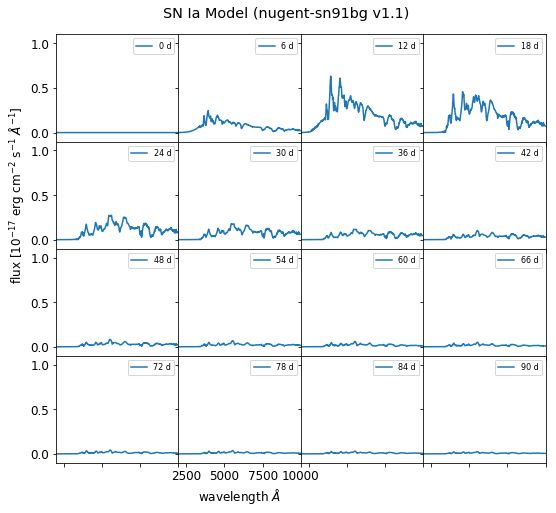

In [11]:
wl = np.arange(2000, 10000, 1)
dt = np.linspace(0, 90, 16)
obs_times = t0 + dt

fig = plot_fluxes(sn_ia, wl, t0, obs_times, sntype='Ia', scale=1e-17)

### salt2

Reference: J. Guy et al., *The Supernova Legacy Survey 3-year sample: Type Ia supernovae photometric distances and cosmological constraints*, AA **523**:A7, 2010, [arXiv:1010.4743](https://arxiv.org/abs/1010.4743).

Note that the `salt2` model is actually of type `Salt2Source`, not `TimeSeriesSource`. Documentation for the class is available [here](https://sncosmo.readthedocs.io/en/v1.7.x/api/sncosmo.SALT2Source.html#sncosmo.SALT2Source). The free parameters are $x_0$, $x_1$, and $c$, such that

$$F(t, \lambda) = x_0 (M_0(t, \lambda) + x_1 M_1(t, \lambda))\times 10^{-0.4 CL(\lambda) c}$$.

In [12]:
t0 = 0.
sn_ia = sncosmo.Model(source='salt2')

print(sn_ia.source)

class      : SALT2Source
name       : 'salt2'
version    : 2.4
phases     : [-20, .., 50] days
wavelengths: [2000, .., 9200] Angstroms
parameters:
  x0 = 1.0
  x1 = 0.0
  c  = 0.0


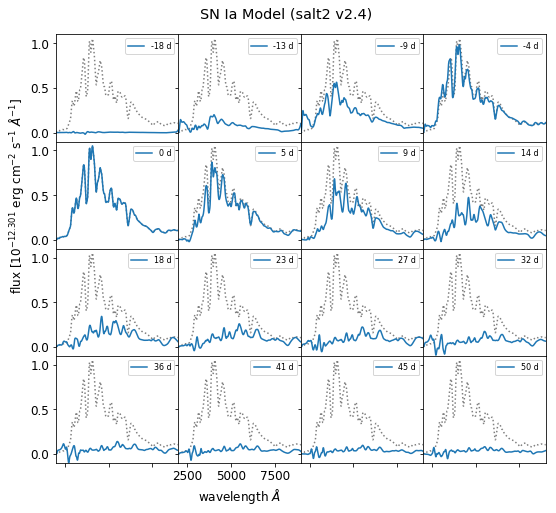

In [13]:
wl = np.arange(2000, 9000, 1)
dt = np.round(np.linspace(-18, 50, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(t0, wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=5e-13)

### salt2 Model with New Parameters

$x_0=1$, $x_1=2$, $c=0$.

In [14]:
t0 = 0.
sn_ia = sncosmo.Model(source='salt2')
sn_ia.set(x0=1., x1=2., c=0.)

print(sn_ia.source)

class      : SALT2Source
name       : 'salt2'
version    : 2.4
phases     : [-20, .., 50] days
wavelengths: [2000, .., 9200] Angstroms
parameters:
  x0 = 1.0
  x1 = 2.0
  c  = 0.0


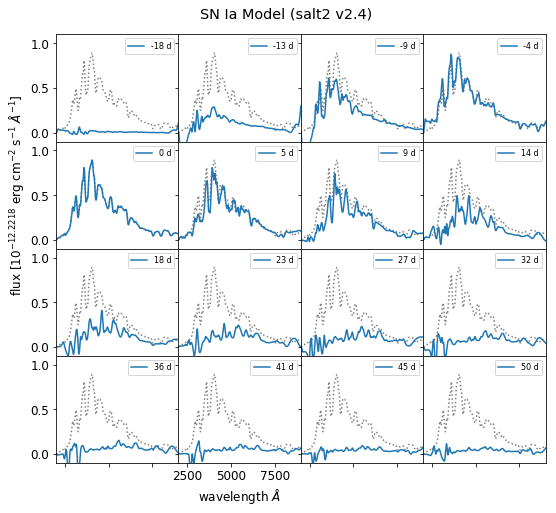

In [15]:
wl = np.arange(2000, 9000, 1)
dt = np.round(np.linspace(-18, 50, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(t0, wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=6e-13)

### salt2-h17

Updated SALT2 model from 2017.

Reference: R. Hounsell et al., *Simulations of the WFIRST Supernova Survey and Forecasts of Cosmological Constraints*, ApJ **867**:23, 2018, [arXiv:1702.01747](https://arxiv.org/abs/1702.01747).

In [16]:
t0 = 0.
sn_ia = sncosmo.Model(source='salt2-h17')
# sn_ia.set(x0=1., x1=0., c=0.)

print(sn_ia.source)

class      : SALT2Source
name       : 'salt2-h17'
version    : 1.0
phases     : [-20, .., 50] days
wavelengths: [2000, .., 24990] Angstroms
parameters:
  x0 = 1.0
  x1 = 0.0
  c  = 0.0


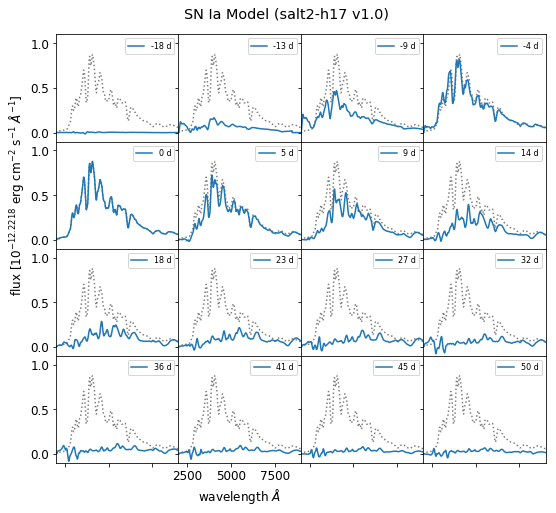

In [17]:
wl = np.arange(2000, 9000, 1)
dt = np.round(np.linspace(-18, 50, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(t0, wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=6e-13)

### snf-2011fe

Reference: R. Pereira et al., *Spectrophotometric time series of SN 2011fe from the Nearby Supernova Factory*, AA **554**:A27, 2013, [arXiv:1302.1292](https://arxiv.org/abs/1302.1292).

In [18]:
t0 = 55000.
sn_ia = sncosmo.Model(source='snf-2011fe')
sn_ia.set(z=0., t0=t0, amplitude=1e-9)

print(sn_ia.source)

class      : TimeSeriesSource
name       : 'snf-2011fe'
version    : 1.0
phases     : [-17.814, .., 97.1] days
wavelengths: [3298.68, .., 9700.88] Angstroms
parameters:
  amplitude = 1e-09


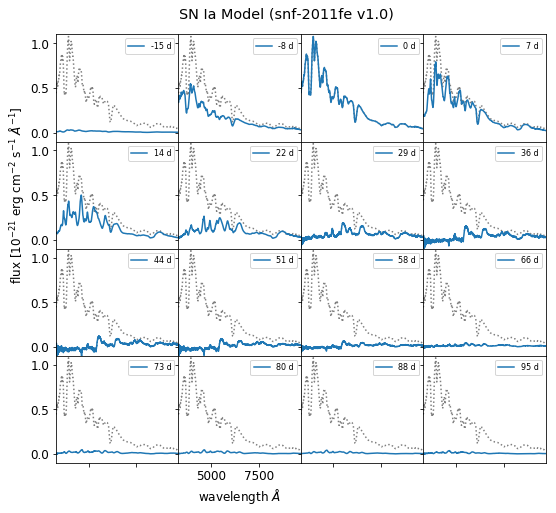

In [19]:
wl = np.arange(3300, 9700, 1)
dt = np.round(np.linspace(-15, 95, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(t0, wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=1e-21)

### SNEMO Models

Reference: C. Saunders et al., *SNEMO: Improved Empirical Models for Type Ia Supernovae*, ApJ **869**:167, 2018, [arXiv:1810.09476](https://arxiv.org/abs/1810.09476).

#### snemo2

SNEMO 2-parameter model with optional extinction.

In [20]:
t0 = 0.
sn_ia = sncosmo.Model(source='snemo2')

print(sn_ia.source)

class      : SNEMOSource
name       : 'snemo2'
version    : 1.0
phases     : [-20, .., 60] days
wavelengths: [3305, .., 8586] Angstroms
parameters:
  c0 = 1.0
  As = 0.0
  c1 = 0.0


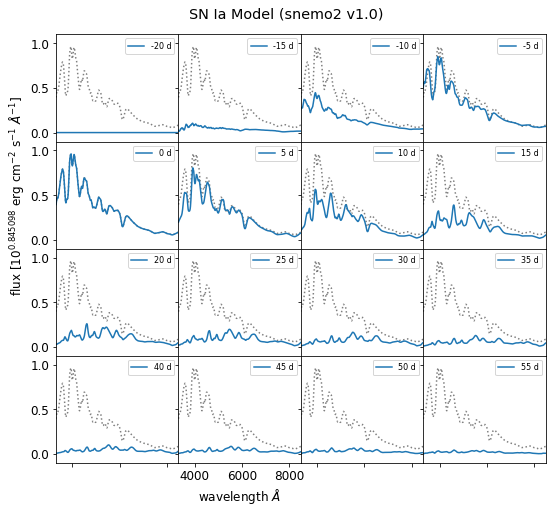

In [21]:
wl = np.arange(3305, 8500, 1)
dt = np.round(np.linspace(-20, 55, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(0., wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=7)

#### snemo7

SNEMO 7-parameter model with optional extinction.

In [22]:
t0 = 0.
sn_ia = sncosmo.Model(source='snemo7')

print(sn_ia.source)

class      : SNEMOSource
name       : 'snemo7'
version    : 1.0
phases     : [-20, .., 60] days
wavelengths: [3305, .., 8586] Angstroms
parameters:
  c0 = 1.0
  As = 0.0
  c1 = 0.0
  c2 = 0.0
  c3 = 0.0
  c4 = 0.0
  c5 = 0.0
  c6 = 0.0


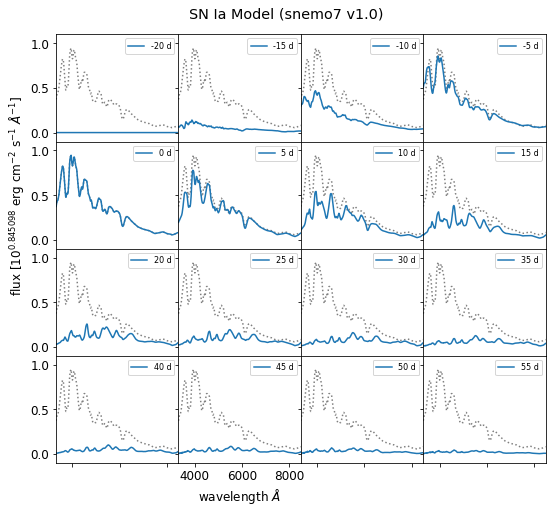

In [23]:
wl = np.arange(3305, 8500, 1)
dt = np.round(np.linspace(-20, 55, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(0., wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=7)

#### snemo15

SNEMO 15-parameter model with optional extinction.

In [24]:
t0 = 0.
sn_ia = sncosmo.Model(source='snemo15')

print(sn_ia.source)

class      : SNEMOSource
name       : 'snemo15'
version    : 1.0
phases     : [-20, .., 60] days
wavelengths: [3305, .., 8586] Angstroms
parameters:
  c0  = 1.0
  As  = 0.0
  c1  = 0.0
  c2  = 0.0
  c3  = 0.0
  c4  = 0.0
  c5  = 0.0
  c6  = 0.0
  c7  = 0.0
  c8  = 0.0
  c9  = 0.0
  c10 = 0.0
  c11 = 0.0
  c12 = 0.0
  c13 = 0.0
  c14 = 0.0


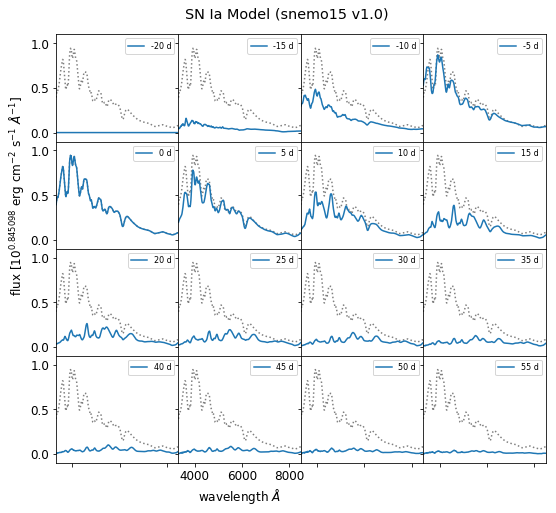

In [25]:
wl = np.arange(3305, 8500, 1)
dt = np.round(np.linspace(-20, 55, 16))
obs_times = t0 + dt

# Calculate spectrum at peak luminosity.
f0 = sn_ia.flux(0., wl)

fig = plot_fluxes(sn_ia, wl, t0, obs_times, f0=f0, sntype='Ia', scale=7)

## SN IIP Models

### nugent-sn2p

Model from R.L. Gilliland, P.E. Nugent, and M.M. Phillips, *High-Redshift Supernovae in the Hubble Deep Field*, ApJ **521**:30, 1999, [astro-ph/9903229](https://arxiv.org/abs/astro-ph/9903229).

In [26]:
t0 = 55000.
sn_iip = sncosmo.Model(source='nugent-sn2p')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'nugent-sn2p'
version    : 1.2
phases     : [0, .., 411] days
wavelengths: [1000, .., 25000] Angstroms
parameters:
  amplitude = 1e-09


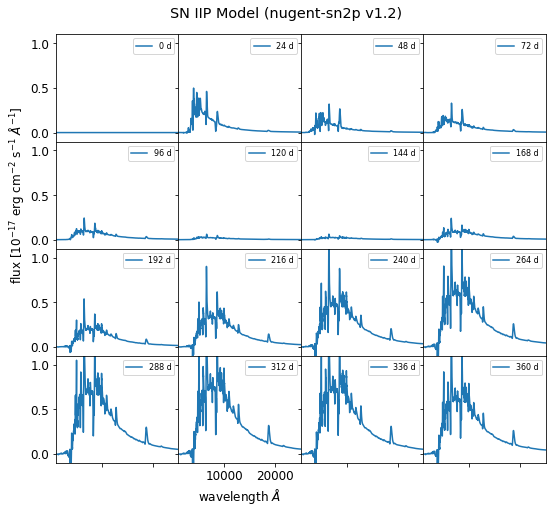

In [27]:
wl = np.arange(sn_iip.source.minwave(), sn_iip.source.maxwave(), 1)
dt = np.linspace(0, 360, 16)
obs_times = t0 + dt

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-17)

### SN IIP Models from SNANA

Loop through models from [SNANA](http://snana.uchicago.edu/).

#### snana-2004hx

In [28]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2004hx')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2004hx'
version    : 1.0
phases     : [-29.86, .., 79.95] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


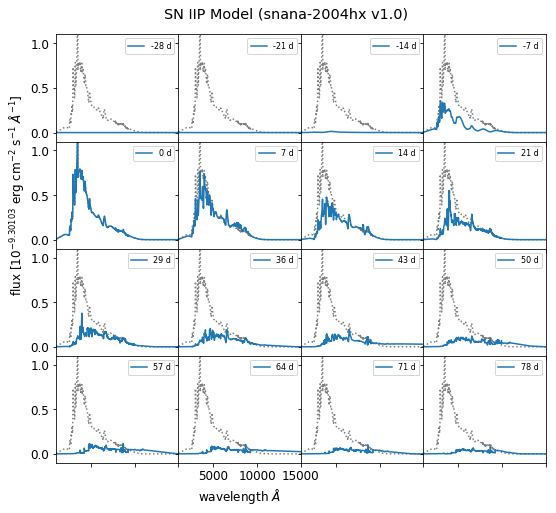

In [29]:
wl = np.arange(1000, 15000, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=5e-10, f0=f0)

#### snana-2005gi

In [30]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2005gi')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2005gi'
version    : 1.0
phases     : [-29.51, .., 79.01] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


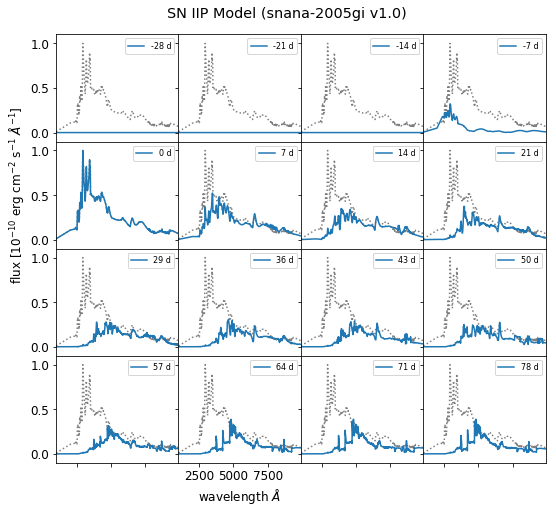

In [31]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-10, f0=f0)

#### snana-2006gq

In [32]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2006gq')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2006gq'
version    : 1.0
phases     : [-28.98, .., 79.45] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


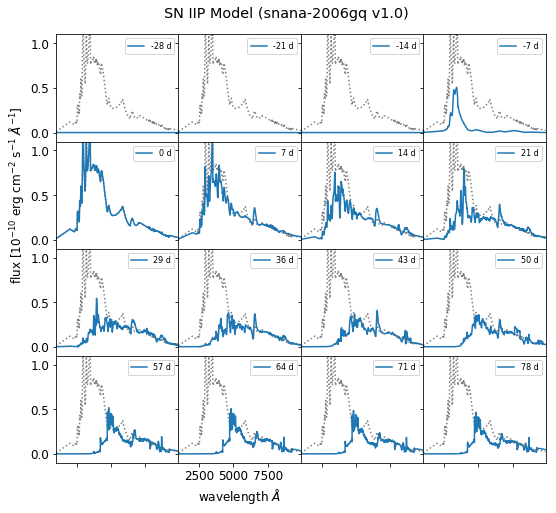

In [33]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-10, f0=f0)

#### snana-2006kn

In [34]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2006kn')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2006kn'
version    : 1.0
phases     : [-25.89, .., 79.44] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


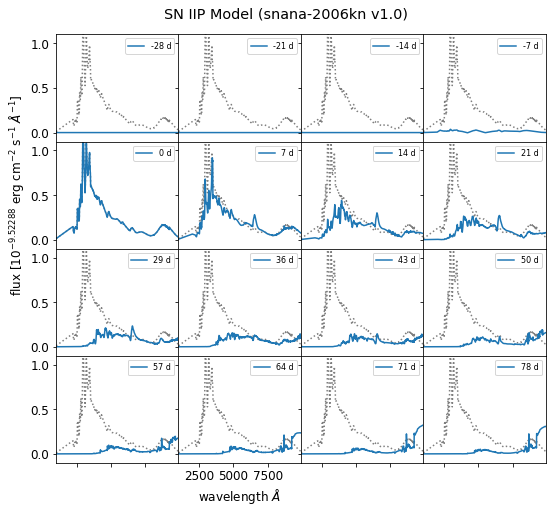

In [35]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=3e-10, f0=f0)

#### snana-2006jl

In [36]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2006jl')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2006jl'
version    : 1.0
phases     : [-29.37, .., 78.64] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


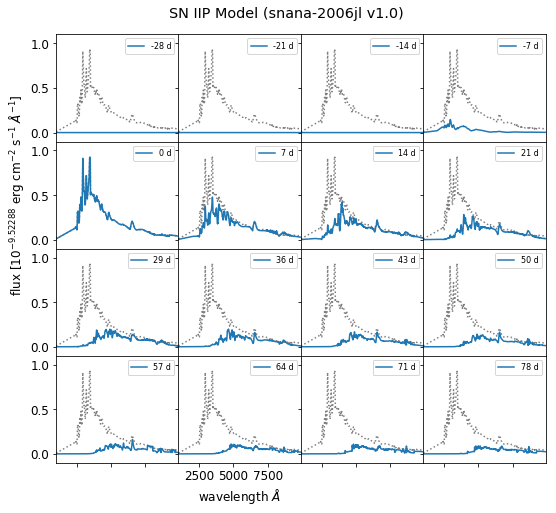

In [37]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=3e-10, f0=f0)

#### snana-2006iw

In [38]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2006iw')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2006iw'
version    : 1.0
phases     : [-28.14, .., 78.59] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


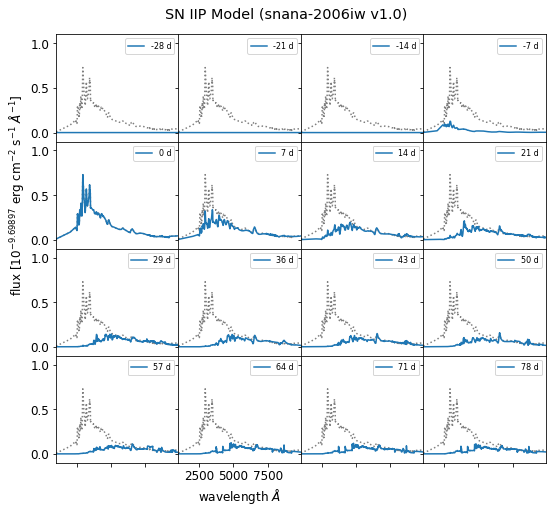

In [39]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=2e-10, f0=f0)

#### snana-2006kv

In [40]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2006kv')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2006kv'
version    : 1.0
phases     : [-29.19, .., 78.15] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


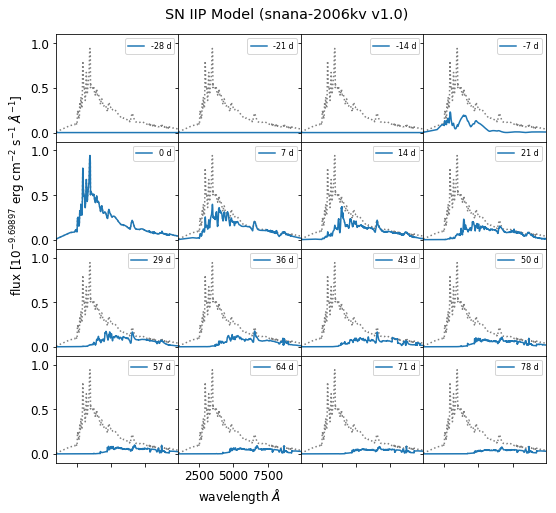

In [41]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=2e-10, f0=f0)

#### snana-2006ns

In [42]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2006ns')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2006ns'
version    : 1.0
phases     : [-29.46, .., 79.46] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


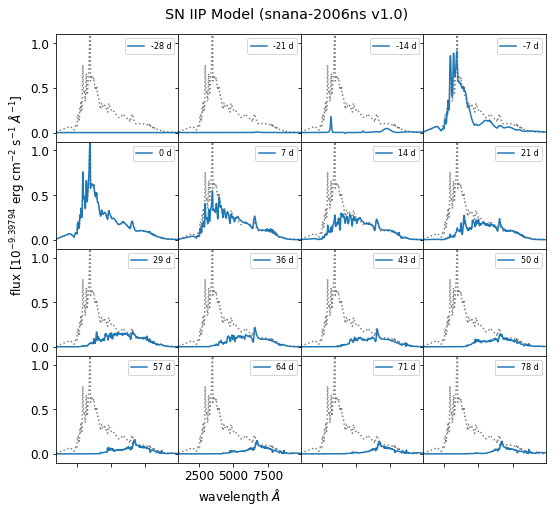

In [43]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=4e-10, f0=f0)

#### snana-2007iz

In [44]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007iz')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007iz'
version    : 1.0
phases     : [-29.52, .., 78.97] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


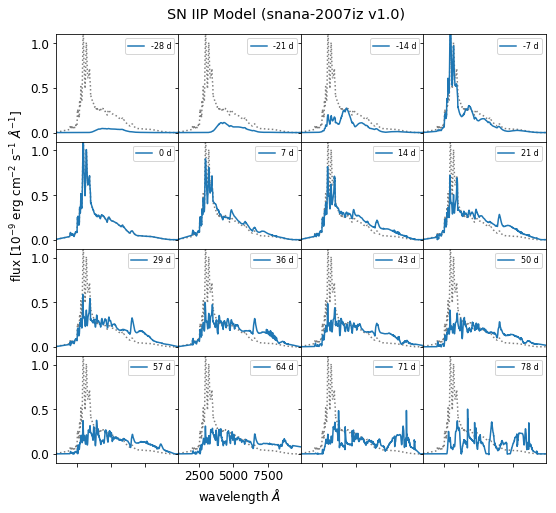

In [45]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-9, f0=f0)

#### snana-2007nr

In [46]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007nr')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007nr'
version    : 1.0
phases     : [-39.32, .., 69.03] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


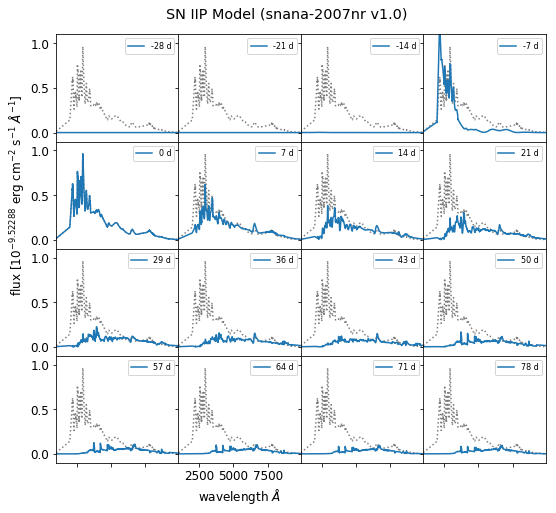

In [47]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=3e-10, f0=f0)

#### snana-2007kw

In [48]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007kw')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007kw'
version    : 1.0
phases     : [-21.54, .., 87.08] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


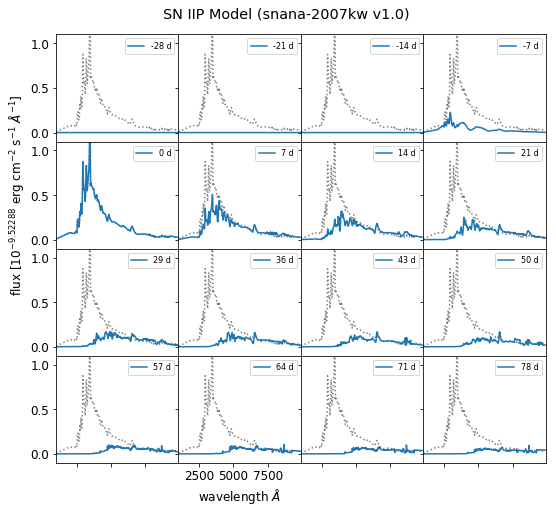

In [49]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=3e-10, f0=f0)

#### snana-2007ky

In [50]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007ky')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007ky'
version    : 1.0
phases     : [-23.29, .., 84.76] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


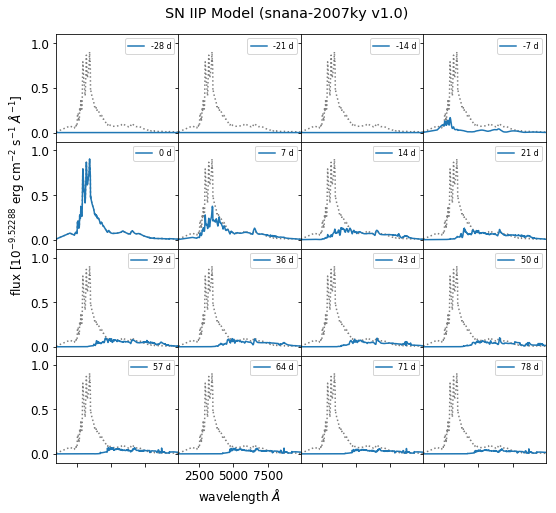

In [51]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=3e-10, f0=f0)

#### snana-2007lj

In [52]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007lj')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007lj'
version    : 1.0
phases     : [-29.52, .., 79.05] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


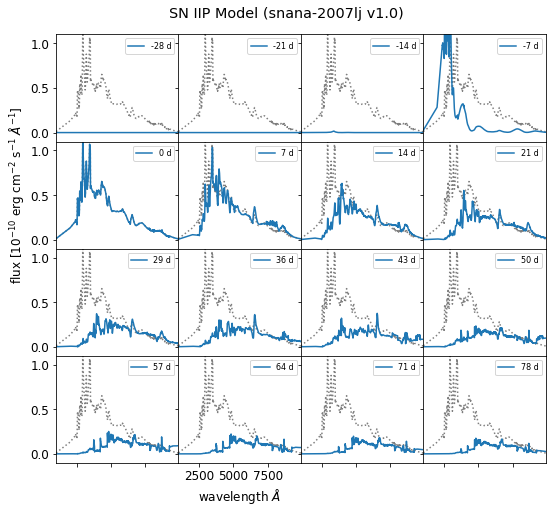

In [53]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-10, f0=f0)

#### snana-2007lb

In [54]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007lb')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007lb'
version    : 1.0
phases     : [-22.27, .., 84.22] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


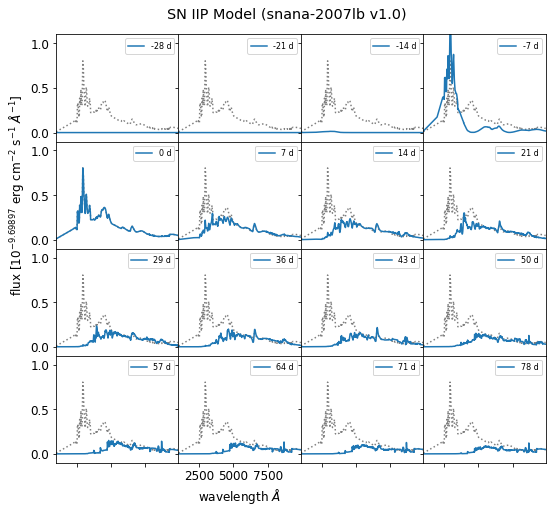

In [55]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=2e-10, f0=f0)

#### snana-2007ll

In [56]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007ll')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007ll'
version    : 1.0
phases     : [-28.68, .., 78.63] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


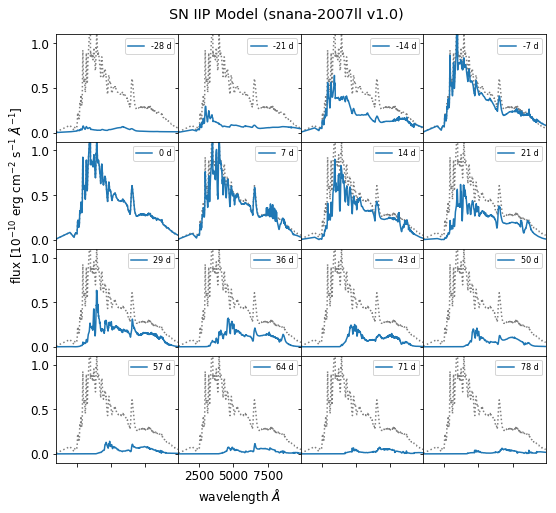

In [57]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-10, f0=f0)

#### snana-2007nw

In [58]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007nw')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007nw'
version    : 1.0
phases     : [-29.32, .., 78.51] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


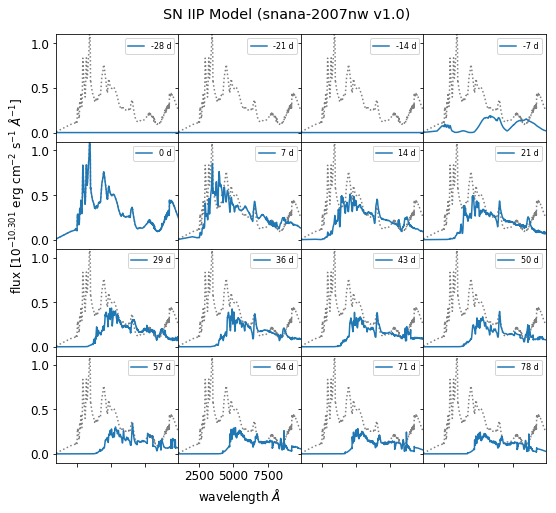

In [59]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=5e-11, f0=f0)

#### snana-2007ld

In [61]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007ld')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007ld'
version    : 1.0
phases     : [-24.34, .., 71.08] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


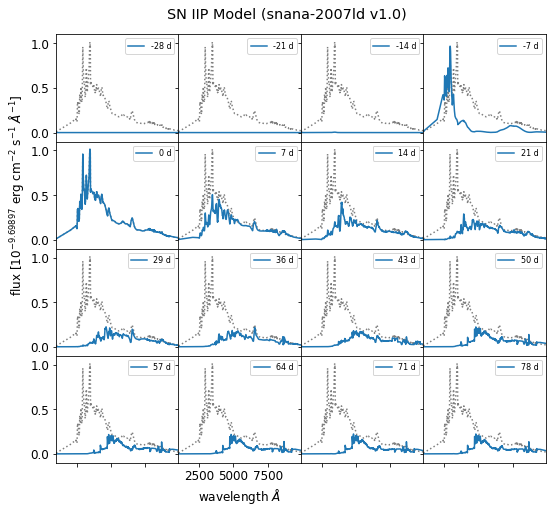

In [62]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=2e-10, f0=f0)

#### snana-2007md

In [63]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007md')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007md'
version    : 1.0
phases     : [-25.6, .., 82.5] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


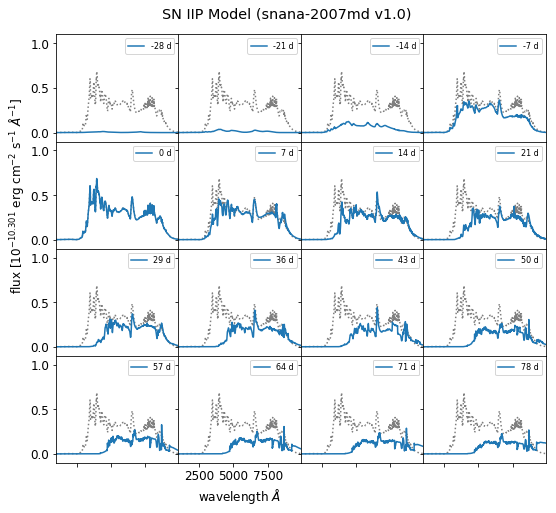

In [64]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=5e-11, f0=f0)

#### snana-2007lz

In [65]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007lz')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007lz'
version    : 1.0
phases     : [-28.34, .., 79.52] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


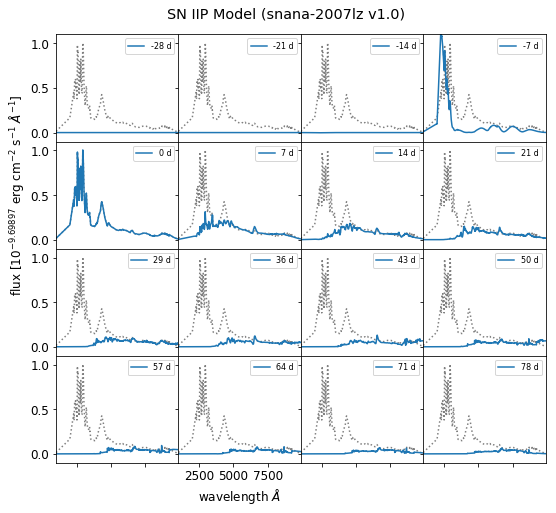

In [66]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=2e-10, f0=f0)

#### snana-2007lx

In [67]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007lx')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007lx'
version    : 1.0
phases     : [-23.66, .., 84.22] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


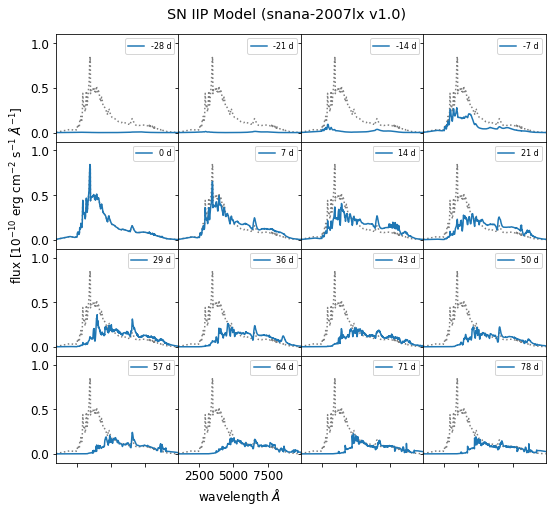

In [68]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-10, f0=f0)

#### snana-2007og

In [69]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007og')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007og'
version    : 1.0
phases     : [-25, .., 83.32] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


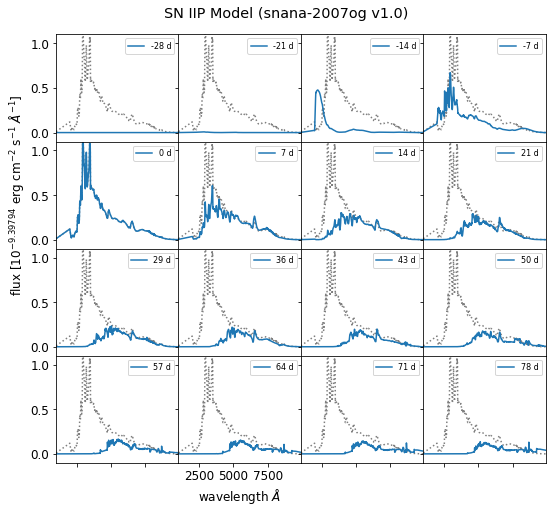

In [70]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=4e-10, f0=f0)

#### snana-2007ny

In [71]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007ny')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007ny'
version    : 1.0
phases     : [-28.79, .., 79.39] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


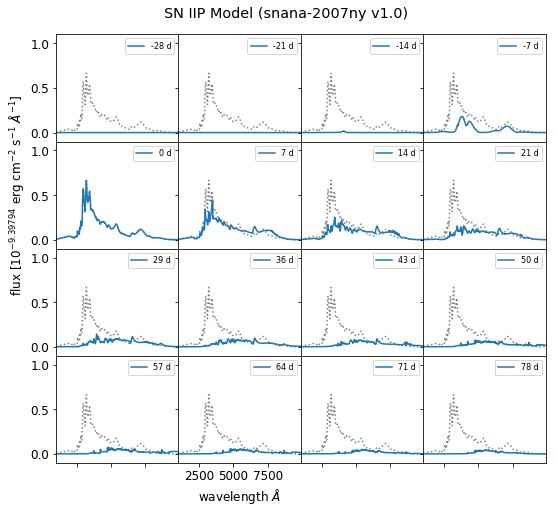

In [72]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=4e-10, f0=f0)

#### snana-2007nv

In [73]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007nv')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007nv'
version    : 1.0
phases     : [-28.85, .., 79.55] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


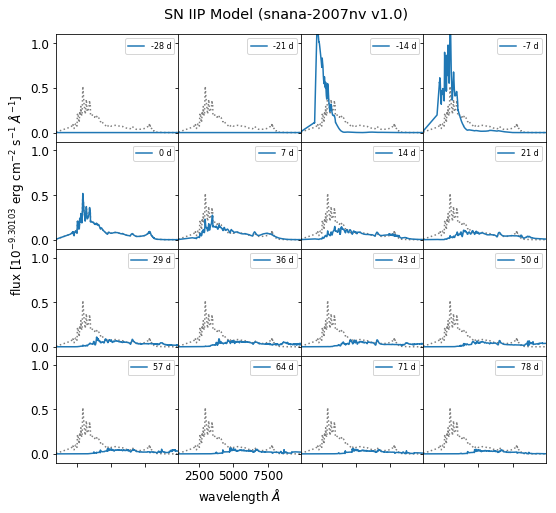

In [74]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=5e-10, f0=f0)

#### snana-2007pg

In [75]:
t0 = 55000.
sn_iip = sncosmo.Model(source='snana-2007pg')
sn_iip.set(z=0., t0=t0, amplitude=1e-9)

print(sn_iip.source)

class      : TimeSeriesSource
name       : 'snana-2007pg'
version    : 1.0
phases     : [-33.07, .., 75.96] days
wavelengths: [300, .., 19990] Angstroms
parameters:
  amplitude = 1e-09


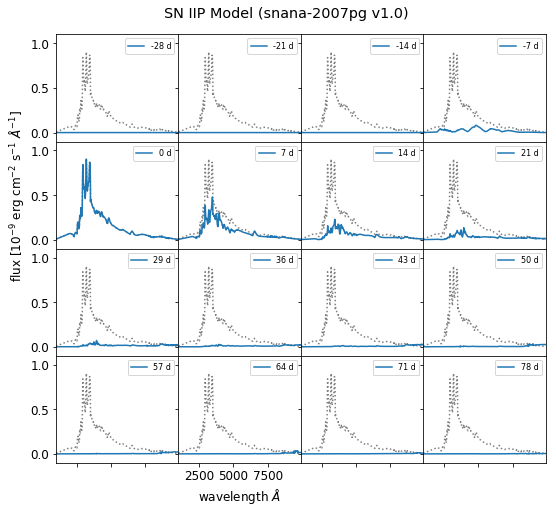

In [76]:
wl = np.arange(1000, 9900, 1)
dt = np.round(np.linspace(-28, 78, 16))
obs_times = t0 + dt

f0 = sn_iip.flux(t0, wl)

fig = plot_fluxes(sn_iip, wl, t0, obs_times, sntype='IIP', scale=1e-9, f0=f0)